**Task**
1.	计算所有用户生命周期的平均值
2.	用图表的形式说明不同时长生命周期的用户数量
3.	分析用户生命周期长短与用户首次购买金额的关系 

**题目说明**

生命周期:用户在一个平台上最后一次购买时间与首次购买时间差为该用户在平台上的生命周期

**业务背景**

用户生命周期的长度可以说明用户在平台上的忠诚度，不同时期的用户表现是不一样的，可以通过人为干预用户的周期
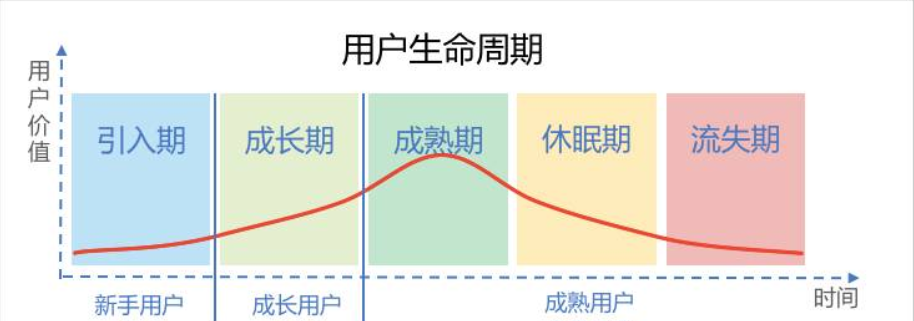

**计算逻辑说明**

1. 将用户的最后一次购买时间和首次购买时间找出来，然后做差就是每一个用户的生命周期时长
2. 根据第1题计算出的生命周期时长去做可视化
3. 同样长短生命周期的用户的首次购买金额是否有什么不同

In [1]:
pwd

'C:\\Users\\lining\\Desktop\\myjob\\My_SQL'

In [8]:
import pandas as pd
df = pd.read_excel('C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\56.xlsx',encoding = "utf-8")
df.head()

,SDate,ShopID,SheetID,STime,CashValue,Payvalue,DisValue,MemberID,Age,Sex,Profession
0,20170405,CDLG,20170405CDLG000310112469,2017-04-05 18:30:39,9.320,9.7,0.0,6920159990D24,35,男,03木材、森林业
1,20170405,CDLG,20170405CDLG000310112470,2017-04-05 18:34:00,47.146,68.3,4.4,692013349548A,28,女,19治安人员
2,20170405,CDLG,20170405CDLG000310112473,2017-04-05 18:36:51,26.396,28.1,0.0,6920123856355,16,女,07建筑工程业（土木工程）
3,20170405,CDLG,20170405CDLG000310112477,2017-04-05 18:44:24,100.140,105.2,43.7,692016804819A,44,女,14公共事业
4,20170405,CDLG,20170405CDLG000310112480,2017-04-05 18:46:38,6.520,6.9,2.0,692016696915B,40,男,11娱乐业


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
SDate         22223 non-null int64
ShopID        22223 non-null object
SheetID       22223 non-null object
STime         22223 non-null datetime64[ns]
CashValue     22223 non-null float64
Payvalue      22223 non-null float64
DisValue      22223 non-null float64
MemberID      22223 non-null object
Age           22223 non-null int64
Sex           22223 non-null object
Profession    13913 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1.9+ MB


In [12]:
#获取用户的最后一次购买时间
last_b = df.sort_values(by = "STime",ascending = False).drop_duplicates("MemberID")
last_b.head()

,SDate,ShopID,SheetID,STime,CashValue,Payvalue,DisValue,MemberID,Age,Sex,Profession
11090,20170430,WDGC,20170430WDGC000110084601,2017-04-30 22:02:32,19.160,20.3,5.90,69201684577B9,48,女,NaN
11089,20170430,WDGC,20170430WDGC000110084599,2017-04-30 21:55:19,17.093,18.2,0.00,69201442770AD,56,女,06餐旅业
11088,20170430,WDGC,20170430WDGC000110084598,2017-04-30 21:54:59,4.212,5.2,0.00,6920146148117,48,女,05交通运输业
11087,20170430,WDGC,20170430WDGC000110084596,2017-04-30 21:54:16,22.184,22.8,8.11,6920158594284,14,女,06餐旅业
11086,20170430,WDGC,20170430WDGC000110084594,2017-04-30 21:53:30,12.765,23.4,1.69,69201257203B9,21,女,NaN


In [13]:
#获取用户的首次购买时间
first_b = df.sort_values(by = "STime",ascending = True).drop_duplicates("MemberID")

In [14]:
#将首次购买时间和最后一次购买时间进行拼接
f_l = first_b.merge(last_b,on = "MemberID",how = "left")

In [15]:
#将首次购买时间和最后一次购买时间做差
f_l["days"] = (f_l['STime_y'] - f_l['STime_x'])
f_l

,SDate_x,ShopID_x,SheetID_x,STime_x,CashValue_x,Payvalue_x,DisValue_x,MemberID,Age_x,Sex_x,...,ShopID_y,SheetID_y,STime_y,CashValue_y,Payvalue_y,DisValue_y,Age_y,Sex_y,Profession_y,days
0,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.00,6920088765037,51,女,...,CDLG,20170426CDLG000910109915,2017-04-26 06:49:33,15.985,16.2,0.00,51,女,NaN,25 days 00:39:35
1,20170401,CDLG,20170401CDLG000910100111,2017-04-01 06:21:59,39.120,41.4,24.90,6920088731552,32,男,...,CDLG,20170430CDLG000910111155,2017-04-30 06:25:54,22.627,23.6,17.65,32,男,09新闻、出版、广告业,29 days 00:03:55
2,20170401,CDLG,20170401CDLG000110071265,2017-04-01 06:23:46,26.744,42.7,0.00,6920163000550,32,男,...,CDLG,20170430CDLG000910111511,2017-04-30 18:34:06,78.512,93.3,4.20,32,男,02渔业,29 days 12:10:20
3,20170401,CDLG,20170401CDLG000910100113,2017-04-01 06:24:23,50.280,51.0,0.00,6920079194000000245201339541429469813149307469...,53,女,...,CDLG,20170428CDLG000710046339,2017-04-28 06:48:28,15.580,15.8,0.00,53,女,05交通运输业,27 days 00:24:05
4,20170401,WDGC,20170401WDGC000510102848,2017-04-01 06:37:42,42.876,44.6,0.00,6920159496F03,32,女,...,WDGC,20170430WDGC000610101965,2017-04-30 06:49:42,9.527,9.7,0.00,32,女,15商业,29 days 00:12:00
5,20170401,WDGC,20170401WDGC000510102852,2017-04-01 06:42:36,50.254,52.3,27.06,6920125792442,32,男,...,WDGC,20170428WDGC000610101269,2017-04-28 06:44:04,17.913,18.4,0.00,32,男,03木材、森林业,27 days 00:01:28
6,20170401,CDLG,20170401CDLG000110071269,2017-04-01 06:43:28,7.276,7.5,0.00,6920075963E3C,41,男,...,CDLG,20170429CDLG000710046866,2017-04-29 07:54:04,86.806,90.4,6.33,41,男,04矿业、采石业,28 days 01:10:36
7,20170401,WDGC,20170401WDGC000510102854,2017-04-01 06:43:40,47.600,99.0,50.50,692016410569D,24,女,...,WDGC,20170422WDGC000310115956,2017-04-22 10:00:23,16.526,31.0,2.53,24,女,NaN,21 days 03:16:43
8,20170401,CDLG,20170401CDLG000910100125,2017-04-01 06:44:50,9.520,9.9,2.60,69201680502DE,17,男,...,CDLG,20170430CDLG000710047223,2017-04-30 07:05:13,10.362,10.5,7.77,17,男,15商业,29 days 00:20:23
9,20170401,WDGC,20170401WDGC000510102859,2017-04-01 06:49:08,30.080,31.6,7.00,692012485800000,39,男,...,WDGC,20170416WDGC000310114119,2017-04-16 08:12:23,-4.870,0.0,0.00,39,男,NaN,15 days 01:23:15


In [16]:
#将时间格式转化为数值格式
f_l["days_num"] = [d.days for d in f_l["days"]]

In [17]:
f_l

,SDate_x,ShopID_x,SheetID_x,STime_x,CashValue_x,Payvalue_x,DisValue_x,MemberID,Age_x,Sex_x,...,SheetID_y,STime_y,CashValue_y,Payvalue_y,DisValue_y,Age_y,Sex_y,Profession_y,days,days_num
0,20170401,CDLG,20170401CDLG000910100106,2017-04-01 06:09:58,8.231,9.1,0.00,6920088765037,51,女,...,20170426CDLG000910109915,2017-04-26 06:49:33,15.985,16.2,0.00,51,女,NaN,25 days 00:39:35,25
1,20170401,CDLG,20170401CDLG000910100111,2017-04-01 06:21:59,39.120,41.4,24.90,6920088731552,32,男,...,20170430CDLG000910111155,2017-04-30 06:25:54,22.627,23.6,17.65,32,男,09新闻、出版、广告业,29 days 00:03:55,29
2,20170401,CDLG,20170401CDLG000110071265,2017-04-01 06:23:46,26.744,42.7,0.00,6920163000550,32,男,...,20170430CDLG000910111511,2017-04-30 18:34:06,78.512,93.3,4.20,32,男,02渔业,29 days 12:10:20,29
3,20170401,CDLG,20170401CDLG000910100113,2017-04-01 06:24:23,50.280,51.0,0.00,6920079194000000245201339541429469813149307469...,53,女,...,20170428CDLG000710046339,2017-04-28 06:48:28,15.580,15.8,0.00,53,女,05交通运输业,27 days 00:24:05,27
4,20170401,WDGC,20170401WDGC000510102848,2017-04-01 06:37:42,42.876,44.6,0.00,6920159496F03,32,女,...,20170430WDGC000610101965,2017-04-30 06:49:42,9.527,9.7,0.00,32,女,15商业,29 days 00:12:00,29
5,20170401,WDGC,20170401WDGC000510102852,2017-04-01 06:42:36,50.254,52.3,27.06,6920125792442,32,男,...,20170428WDGC000610101269,2017-04-28 06:44:04,17.913,18.4,0.00,32,男,03木材、森林业,27 days 00:01:28,27
6,20170401,CDLG,20170401CDLG000110071269,2017-04-01 06:43:28,7.276,7.5,0.00,6920075963E3C,41,男,...,20170429CDLG000710046866,2017-04-29 07:54:04,86.806,90.4,6.33,41,男,04矿业、采石业,28 days 01:10:36,28
7,20170401,WDGC,20170401WDGC000510102854,2017-04-01 06:43:40,47.600,99.0,50.50,692016410569D,24,女,...,20170422WDGC000310115956,2017-04-22 10:00:23,16.526,31.0,2.53,24,女,NaN,21 days 03:16:43,21
8,20170401,CDLG,20170401CDLG000910100125,2017-04-01 06:44:50,9.520,9.9,2.60,69201680502DE,17,男,...,20170430CDLG000710047223,2017-04-30 07:05:13,10.362,10.5,7.77,17,男,15商业,29 days 00:20:23,29
9,20170401,WDGC,20170401WDGC000510102859,2017-04-01 06:49:08,30.080,31.6,7.00,692012485800000,39,男,...,20170416WDGC000310114119,2017-04-16 08:12:23,-4.870,0.0,0.00,39,男,NaN,15 days 01:23:15,15


In [18]:
#计算用户平均生命周期时长
f_l["days_num"].mean()

12.947142857142858

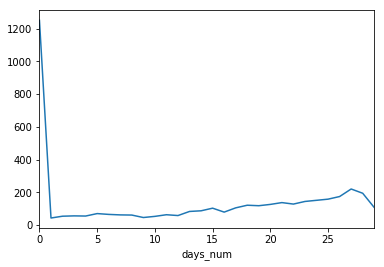

In [19]:
#不同生命周期的用户数量
%matplotlib inline 
import matplotlib.pyplot as plt
f_l.groupby(f_l["days_num"])["MemberID"].count().plot()

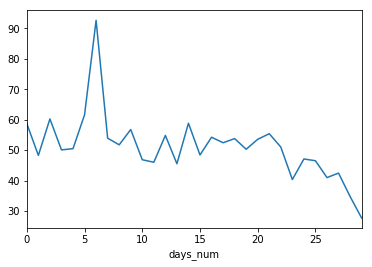

In [20]:
#不同生命周期用户与首次购买金额的关系
f_l.groupby("days_num")["CashValue_x"].mean().plot()